In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl


In [3]:
train_data = pd.read_excel('Data_Train.xlsx')

In [4]:
train_data


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 missing values in Route and Total stops

In [6]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data = train_data.dropna()

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Check Duplicate values 

In [9]:
train_data[train_data.duplicated(keep = False)].sort_values(by = train_data.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


from this all identicle rows appear side by side

In [10]:
train_data = train_data.drop_duplicates()

In [11]:
train_data[train_data.duplicated(keep = False)].sort_values(by = train_data.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


see no duplicate values

## Date Feature Engineering

In [12]:
data = train_data.copy()

In [13]:
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
data["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [15]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y")

In [16]:
data["Journey_day"] = data["Date_of_Journey"].dt.day
data["Journey_month"] = data["Date_of_Journey"].dt.month
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [17]:
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


To ignore warnings

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
data["Arrival_Time_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_Time_minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [20]:
data["Dep_Time_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Time_minute"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


# Lets analyse when most flight take off

In [25]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
       return "Early Morning" 
    
    elif(x>8) and (x<=12):
        return "Morning"

    elif(x>12) and (x<=16):
        return "Noon"

    elif(x>16) and (x<=20):
        return "Evening"

    elif(x>20) and (x<=24):
        return "Night"

    else:
        return "Late night"

In [26]:
data["Dep_Time_hour"].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10462, dtype: object

In [27]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2814
Evening          2323
Morning          2170
Noon             1696
Night             995
Late night        464
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

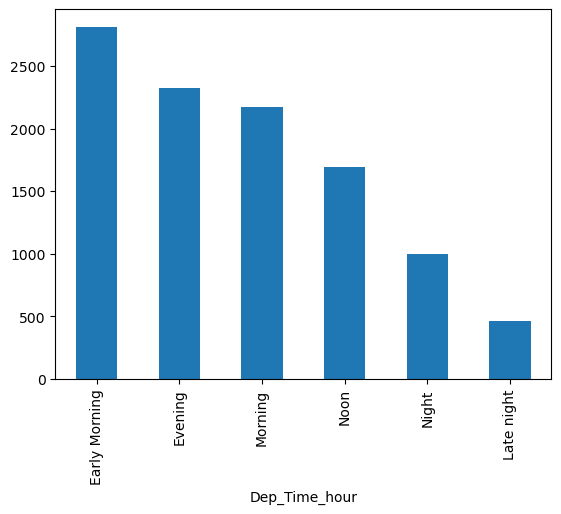

In [28]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [29]:
!pip install plotly

In [30]:
import plotly.express as px

In [34]:
counts = data["Dep_Time_hour"].apply(flight_dep_time).value_counts().reset_index()
counts.columns = ["Dep_Shift", "total_flights"]

In [35]:
counts

,Dep_Shift,total_flights
0,Early Morning,2814
1,Evening,2323
2,Morning,2170
3,Noon,1696
4,Night,995
5,Late night,464


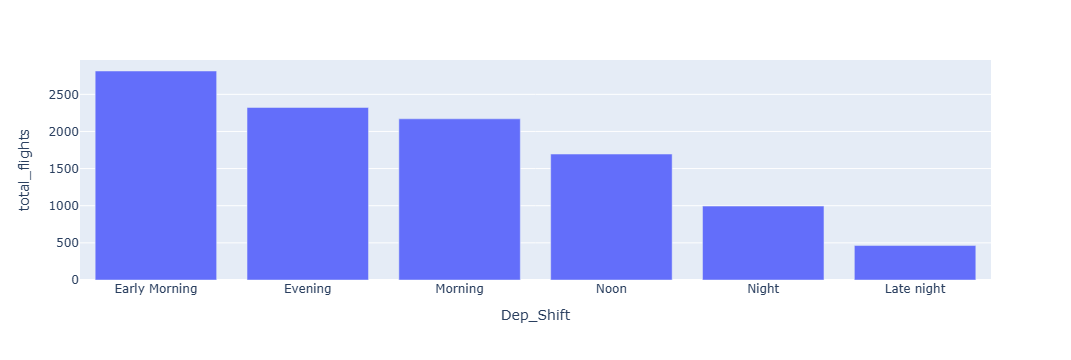

In [38]:
px.bar(data_frame = counts, x = "Dep_Shift" , y = "total_flights")

# Data Pre Processing on Duration

In [40]:
def preprocess_duration(x):
    if "h" not in x:
        x = '0h' +  ' ' + x
    elif "m" not in x:
        x = x + ' ' + '0m'

    return x

        

In [41]:
data["Duration"].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [45]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minutes"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

In [49]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

In [50]:
col_to_drop = ['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration']

In [51]:
data.drop(col_to_drop, axis = 1, inplace=True)

In [52]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

# Analyse whether Duration impacts Price or not?

In [53]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Journey_year            int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Duration_hour           int64
Duration_minutes        int64
dtype: object

In [54]:
data["Duration_total_mins"] = data["Duration_hour"] * 60 + data["Duration_minutes"]

In [55]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445


In [56]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour', 'Duration_minutes',
       'Duration_total_mins'],
      dtype='object')

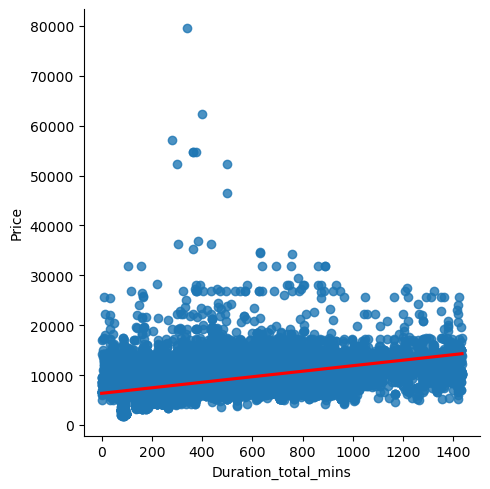

In [58]:
sns.lmplot(data = data , x = "Duration_total_mins", y = "Price", line_kws={"color" : "red"})

Positive slope is there increase in Duration -> Increase in Prices


In [59]:
import numpy as np

In [61]:
m, c = np.polyfit(data["Duration_total_mins"] , data["Price"], 1)

In [62]:
m


np.float64(5.535752729771948)

In [63]:
c

np.float64(6345.852544716855)

Price = m * Duration + c(Base Price)

# Applying on one hot encoding on data

In [64]:
dataframe = data.copy()

In [67]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Journey_year            int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Duration_hour           int64
Duration_minutes        int64
Duration_total_mins     int64
dtype: object

There are 2 types of columns 
1. Categorical data - groups, labels
2. Numerical data - numbers , age,

In [75]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [76]:
num_col = [col for col in data.columns if data[col].dtype != "object"]
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hour',
 'Duration_minutes',
 'Duration_total_mins']

In [78]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [84]:
source_dummies = pd.get_dummies(data["Source"] , prefix= "Source").astype(int)

In [86]:
data = pd.concat([data , source_dummies] , axis = 1)

# Lets Perform target guided encoding on Data

In [92]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [97]:
data["Airline"].nunique()

12

In [98]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [99]:
# Target mean guided encoding

In [101]:
data.groupby(["Airline"])["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4335.841718
Air Asia                              5590.260188
IndiGo                                5668.469897
GoAir                                 5861.056701
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Air India                             9556.608028
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [103]:
airlines = data.groupby(["Airline"])["Price"].mean().sort_values().index

In [107]:
numbers = range(len(airlines))

In [109]:
dict_airlines = dict(zip(airlines, numbers))

In [110]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [111]:
## low number means cheaper airline and higher number means costly airine

In [114]:
data["Airline"] = data["Airline"].map(dict_airlines)

In [115]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,...,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,...,5,50,7,25,445,0,0,0,1,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,...,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,...,18,5,5,25,325,0,0,0,1,0
4,3,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,...,16,50,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,...,19,55,2,30,150,0,0,0,1,0
10679,7,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,...,20,45,2,35,155,0,0,0,1,0
10680,10,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,...,8,20,3,0,180,1,0,0,0,0
10681,5,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,...,11,30,2,40,160,1,0,0,0,0


In [117]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [118]:
data["Destination"].replace('New Delhi', 'Delhi', inplace= True)

In [119]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [120]:
Destination = data.groupby(["Destination"])["Price"].mean().sort_values().index

In [121]:
Destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [122]:
numbers = range(len(Destination))

In [123]:
dict_dest = dict(zip(Destination, numbers))

In [124]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [154]:
data["Destination"] = data["Destination"].map(dict_dest)

In [155]:
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10462, dtype: int64

In [157]:
data.drop('Destnation', axis = 1, inplace= True)

# Perform Label Encoding on Data

In [128]:
data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10462, dtype: object

In [132]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [133]:
stop = {'non-stop' : 0, '2 stops' : 2, '1 stop' : 1, '3 stops' : 3, '4 stops' : 4}

In [135]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,...,Dep_Time_minute,Duration_hour,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destnation
0,3,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,...,20,2,50,170,1,0,0,0,0,2
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,...,50,7,25,445,0,0,0,1,0,3


In [140]:
data["Additional_Info"].value_counts()/len(data)

Additional_Info
No info                         0.782068
In-flight meal not included     0.184095
No check-in baggage included    0.030396
1 Long layover                  0.001816
Change airports                 0.000669
Business class                  0.000382
No Info                         0.000287
1 Short layover                 0.000096
Red-eye flight                  0.000096
2 Long layover                  0.000096
Name: count, dtype: float64

In [143]:
## 78% data is missing have no info label in Additional Info

In [144]:
## we  can drop this column


# List of columns that can be dropped

In [145]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour', 'Duration_minutes',
       'Duration_total_mins', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destnation'],
      dtype='object')

In [146]:
columns = ['Additional_Info', 'Duration_total_mins', 'Source', 'Journey_year', 'Route' ]

In [151]:
data.drop(columns = columns , axis = 1, inplace= True)

In [159]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour', 'Duration_minutes',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai'],
      dtype='object')

In [160]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2 stops,7662,1,5,13,15,5,50,7,25,0,0,0,1,0
2,10,4,2 stops,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1 stop,6218,12,5,23,30,18,5,5,25,0,0,0,1,0
4,3,2,1 stop,13302,1,3,21,35,16,50,4,45,1,0,0,0,0


# Lets Perform Outlier Detection

In [166]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3 , 1)

    sns.distplot(df[col], ax= ax1)
    sns.boxplot(data = df, x = col, ax = ax2)
    sns.distplot(df[col], ax= ax3, kde=False)

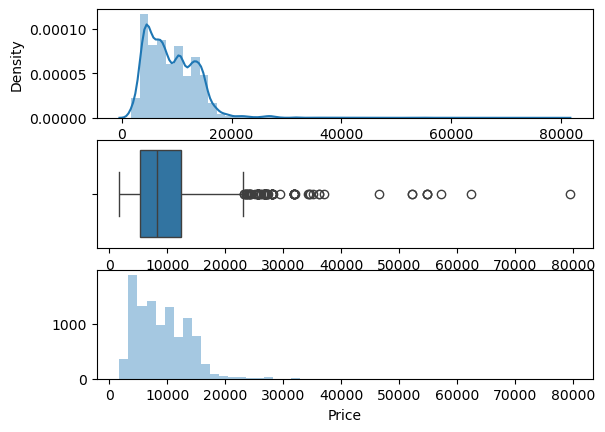

In [167]:
plot(data, "Price")

In [170]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)

In [172]:
iqr = q3 - q1
iqr

np.float64(7120.75)

In [174]:
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [175]:
maximum

np.float64(23025.875)

In [176]:
minimum

np.float64(-5457.125)

In [180]:
print([ price for price in data["Price"] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [181]:
len([ price for price in data["Price"] if price>maximum or price<minimum])

94

In [182]:
## 94 outliers are there


In [183]:
data["Price"] = np.where(data["Price"]>=35000 , data["Price"].median(), data["Price"])

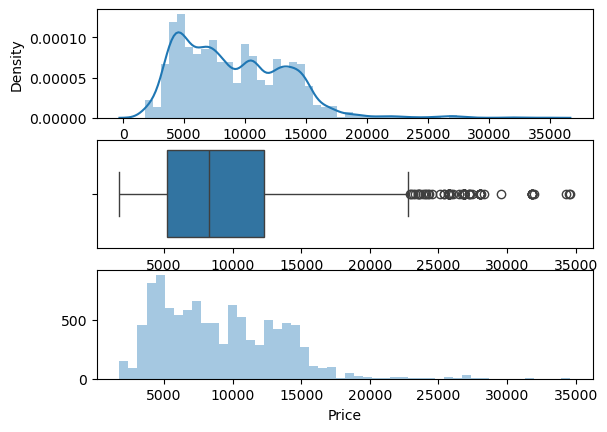

In [184]:
plot(data, "Price")